<a href="https://colab.research.google.com/github/tshreegupta/ECE595DL/blob/main/Project1/Project_1_Student_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Tanushree Gupta
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [1]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [2]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

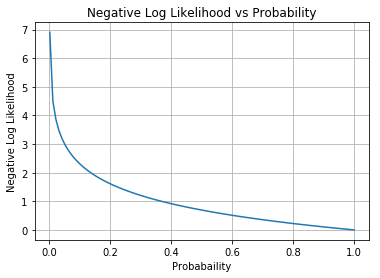

In [ ]:
#Show cross-entropy loss function

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
p = np.linspace(0.001,1.0,100)
n_logp = -np.log(p)
plt.plot(p,n_logp)
plt.title('Negative Log Likelihood vs Probability')
plt.xlabel('Probabaility')
plt.ylabel('Negative Log Likelihood')
plt.grid(True)
plt.show()

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: When p is small, negative log-likelihood reaches infinity whereas when p is large, it reaches 0.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: As negative log-likelihood is inversely propotional to the probabilty, it makes a good objective function. Minimisation of negative log-likelihood function will give maximum probability.




#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    # 1: 2-D Convolution Layer with 256 feature and 3*3 filter Size
    model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))

    # 2: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 3: 2-D Convolution Layer with 128 feature and 3*3 filter Size
    model.add(Conv2D(128,(3,3),activation='relu'))

    # 4: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 5: Flatten the network
    model.add(Flatten())

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 7: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(10, activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_overfit.compile(loss= 'categorical_crossentropy',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
cnn_model_mdata = CNN_overfit.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_overfit.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 19s 311us/step - loss: 0.6707 - accuracy: 0.7512 - val_loss: 0.4293 - val_accuracy: 0.8438
Epoch 2/100
60000/60000 [==============================] - 13s 211us/step - loss: 0.3720 - accuracy: 0.8632 - val_loss: 0.3958 - val_accuracy: 0.8576
Epoch 3/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.3048 - accuracy: 0.8867 - val_loss: 0.3253 - val_accuracy: 0.8799
Epoch 4/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.2660 - accuracy: 0.9019 - val_loss: 0.3074 - val_accuracy: 0.8879
Epoch 5/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.2387 - accuracy: 0.9099 - val_loss: 0.3221 - val_accuracy: 0.8818
Epoch 6/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.2140 - accuracy: 0.9194 - val_loss: 0.3037 - val_accuracy: 0.8881
Epoch 7/100
60000/60000 [=========================

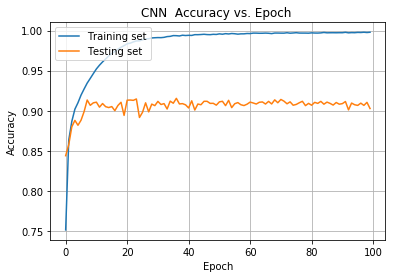

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

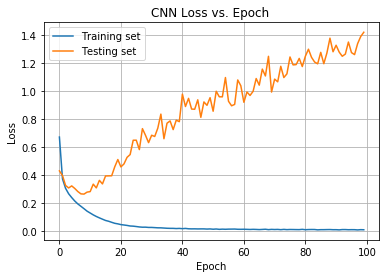

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.0090

2.   What does the loss of the testing set go to? 

  ANS: 1.4190
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: Due to overfitting of training data, the network performs well on training set but not on testing set.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Due to overfitting of training set, the network is not able to perform well on testing set. It's not able to generalise to the unseen data.

  Two ways to avoid overfitting is:

  1) Add Dropout Layers which will randomly remove certain features by setting them to zero.

  2) By adding regularisation term, which comes down to adding cost to the loss function for large weights. 

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    # 0: Dropout 30%
    model.add(Dropout(0.30))
    # 1: 2-D Convolution Layer with 256 feature and 3*3 filter Size
    model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))

    # 2: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 3: 2-D Convolution Layer with 128 feature and 3*3 filter Size
    model.add(Conv2D(128,(3,3),activation='relu'))

    # 4: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 5: Flatten the network
    model.add(Flatten())

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 7: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(10, activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_in.compile(loss= 'categorical_crossentropy',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
cnn_dropout_mdata = CNN_dropout_in.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_dropout_in.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0783 - accuracy: 0.2853 - val_loss: 0.0510 - val_accuracy: 0.6217
Epoch 2/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0414 - accuracy: 0.6910 - val_loss: 0.0379 - val_accuracy: 0.7240
Epoch 3/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0357 - accuracy: 0.7346 - val_loss: 0.0432 - val_accuracy: 0.6804
Epoch 4/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0315 - accuracy: 0.7689 - val_loss: 0.0330 - val_accuracy: 0.7479
Epoch 5/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0287 - accuracy: 0.7911 - val_loss: 0.0286 - val_accuracy: 0.7928
Epoch 6/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.0267 - accuracy: 0.8071 - val_loss: 0.0278 - val_accuracy: 0.8047
Epoch 7/100
60000/60000 [=========================

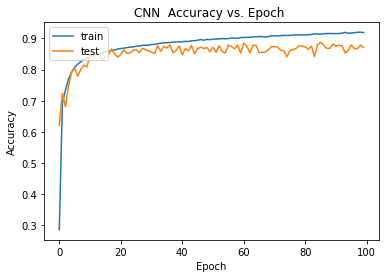

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_mdata.history['accuracy'])
plt.plot(cnn_dropout_mdata.history['val_accuracy'])
plt.title('CNN  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

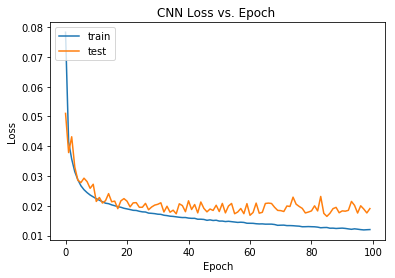

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_mdata.history['loss'])
plt.plot(cnn_dropout_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.0120
  
2.   What does the loss of the testing set go to? 

  ANS: 0.0190

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Dropout is added only on the input layer which randomly removed 30% input in every update cycle. But there is no droput on the hidden layer which resulted in overfitting in hidden layer weights.

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    # 1: 2-D Convolution Layer with 256 feature and 3*3 filter Size
    model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))

    # 1.1: Dropout 30%
    model.add(Dropout(0.30))

    # 2: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 3: 2-D Convolution Layer with 128 feature and 3*3 filter Size
    model.add(Conv2D(128,(3,3),activation='relu'))

    # 3.1: Dropout 30%
    model.add(Dropout(0.30))

    # 4: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 5: Flatten the network
    model.add(Flatten())

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 7: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(10, activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_hidden.compile(loss= 'categorical_crossentropy',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
cnn_dropout_h_mdata = CNN_dropout_hidden.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_dropout_hidden.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 27s 452us/step - loss: 0.0813 - accuracy: 0.2516 - val_loss: 0.0623 - val_accuracy: 0.5222
Epoch 2/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.0416 - accuracy: 0.6881 - val_loss: 0.0434 - val_accuracy: 0.6877
Epoch 3/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.0342 - accuracy: 0.7454 - val_loss: 0.0330 - val_accuracy: 0.7598
Epoch 4/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.0300 - accuracy: 0.7807 - val_loss: 0.0365 - val_accuracy: 0.7081
Epoch 5/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.0271 - accuracy: 0.8045 - val_loss: 0.0314 - val_accuracy: 0.7692
Epoch 6/100
60000/60000 [==============================] - 21s 350us/step - loss: 0.0251 - accuracy: 0.8204 - val_loss: 0.0274 - val_accuracy: 0.8034
Epoch 7/100
60000/60000 [=========================

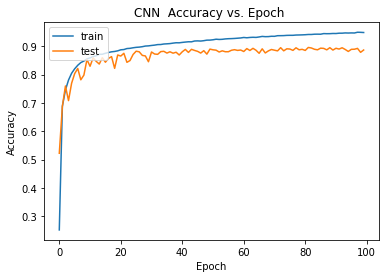

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_h_mdata.history['accuracy'])
plt.plot(cnn_dropout_h_mdata.history['val_accuracy'])
plt.title('CNN  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

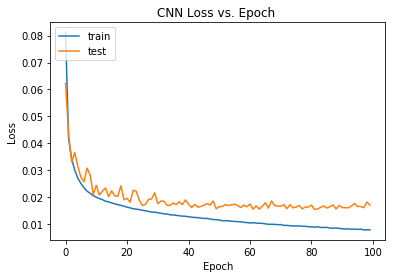

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_h_mdata.history['loss'])
plt.plot(cnn_dropout_h_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: 0.0079
  
2.   What does the loss of the testing set go to? 

  ANS: 0.0171

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Using dropout on a hidden layers is better because it randomly drops 30% weights to zero and forces the network to learn again thereby avoiding overfitting on training data and generalising better on testing data.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: Difference in accuracy is 0.0617. The model predicts testing data with less than 90% accuracy(88%) which suggests that this model can be improved further for the given data.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [3]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # 0: Dropout
    model.add(Dropout(0.30))

     # 1: 2-D Convolution Layer with 256 feature and 3*3 filter Size
    model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))

    # 1.1: Dropout 30%
    model.add(Dropout(0.30))

    # 2: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 3: 2-D Convolution Layer with 128 feature and 3*3 filter Size
    model.add(Conv2D(128,(3,3),activation='relu'))

    # 3.1: Dropout 30%
    model.add(Dropout(0.30))

    # 4: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 5: Flatten the network
    model.add(Flatten())

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 7: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(10, activation='softmax'))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both.compile(loss= 'categorical_crossentropy',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
cnn_dropout_both_mdata = CNN_dropout_both.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_dropout_both.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 27s 451us/step - loss: 0.7402 - accuracy: 0.7179 - val_loss: 0.7604 - val_accuracy: 0.7582
Epoch 2/100
60000/60000 [==============================] - 21s 350us/step - loss: 0.4544 - accuracy: 0.8284 - val_loss: 0.4999 - val_accuracy: 0.8494
Epoch 3/100
60000/60000 [==============================] - 21s 349us/step - loss: 0.3899 - accuracy: 0.8533 - val_loss: 0.5370 - val_accuracy: 0.8528
Epoch 4/100
60000/60000 [==============================] - 21s 349us/step - loss: 0.3590 - accuracy: 0.8635 - val_loss: 0.4441 - val_accuracy: 0.8598
Epoch 5/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.3386 - accuracy: 0.8714 - val_loss: 0.4454 - val_accuracy: 0.8644
Epoch 6/100
60000/60000 [==============================] - 21s 349us/step - loss: 0.3213 - accuracy: 0.8773 - val_loss: 0.3855 - val_accuracy: 0.8678
Epoch 7/100
60000/60000 [=========================

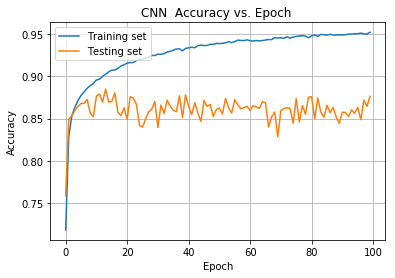

In [4]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_both_mdata.history['accuracy'])
plt.plot(cnn_dropout_both_mdata.history['val_accuracy'])
plt.title('CNN  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

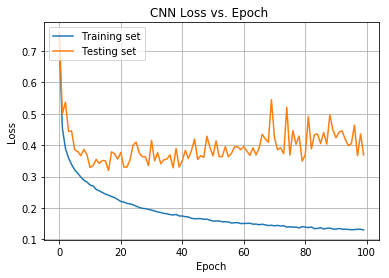

In [5]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cnn_dropout_both_mdata.history['loss'])
plt.plot(cnn_dropout_both_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 0.37
  
2.   What does the loss of the testing set go to? 

  ANS: 0.1296
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 95.6%-87.2% = 8.4%

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: Difference in accuracy between training and testing set is much lesser in 5 than in 4. Since, the model in 5th part fits equally in both training and testing data it is more robust towards unseen data as compared to model in 4.

#Part 5 : Activation Functions

In [12]:
#Create and train model architecture
def CNN_dropout_both_act(act):

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    # 1: 2-D Convolution Layer with 256 feature and 3*3 filter Size
    model.add(Conv2D(256,(3,3),activation='relu',input_shape=(28,28,1)))

    # 1.1: Dropout 30%
    model.add(Dropout(0.30))

    # 2: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 3: 2-D Convolution Layer with 128 feature and 3*3 filter Size
    model.add(Conv2D(128,(3,3),activation='relu'))

    # 3.1: Dropout 30%
    model.add(Dropout(0.30))

    # 4: Max Pooling Layer with 2*2 pool size
    model.add(MaxPooling2D(pool_size=(2,2),strides=None, padding='valid',data_format=None))

    # 5: Flatten the network
    model.add(Flatten())

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 7: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(100, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    model.add(Dense(10, activation=act))
    return model


In [48]:
##### Sigmoid Activation
#Create instance of CNN model graph
CNN_dropout_both_act_model = CNN_dropout_both_act("sigmoid")

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both_act_model.compile(loss= 'mean_squared_error',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_act_mdata = CNN_dropout_both_act_model.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_dropout_both_act_model.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 353us/step - loss: 0.0411 - accuracy: 0.7045 - val_loss: 0.0286 - val_accuracy: 0.8356
Epoch 2/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0211 - accuracy: 0.8568 - val_loss: 0.0206 - val_accuracy: 0.8677
Epoch 3/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0175 - accuracy: 0.8799 - val_loss: 0.0200 - val_accuracy: 0.8773
Epoch 4/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0157 - accuracy: 0.8926 - val_loss: 0.0177 - val_accuracy: 0.8861
Epoch 5/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.0144 - accuracy: 0.9029 - val_loss: 0.0215 - val_accuracy: 0.8499
Epoch 6/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0134 - accuracy: 0.9087 - val_loss: 0.0168 - val_accuracy: 0.8846
Epoch 7/100
60000/60000 [=========================

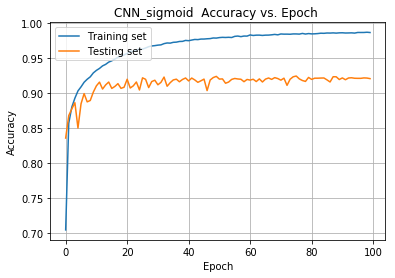

In [49]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_act_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_mdata.history['val_accuracy'])
plt.title('CNN_sigmoid  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

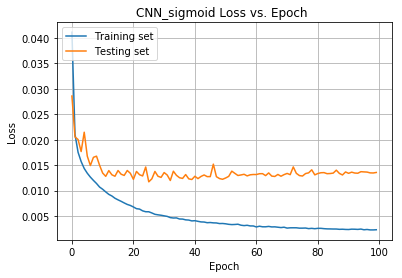

In [50]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_act_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_mdata.history['val_loss'])
plt.title('CNN_sigmoid Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

In [15]:
####### Tanh activation
#Create instance of CNN model graph
CNN_dropout_both_act_tanh = CNN_dropout_both_act('tanh')

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both_act_tanh.compile(loss= 'mean_squared_error',
                    optimizer= 'RMSprop',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_act_mdata = CNN_dropout_both_act_tanh.fit(data_train,labels_train,
                                  batch_size=256,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(data_test,labels_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_dropout_both_act_tanh.evaluate(data_test,labels_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 353us/step - loss: 0.0365 - accuracy: 0.7660 - val_loss: 0.0289 - val_accuracy: 0.8373
Epoch 2/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.0193 - accuracy: 0.8742 - val_loss: 0.0227 - val_accuracy: 0.8665
Epoch 3/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0160 - accuracy: 0.8960 - val_loss: 0.0183 - val_accuracy: 0.8879
Epoch 4/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0145 - accuracy: 0.9054 - val_loss: 0.0181 - val_accuracy: 0.8882
Epoch 5/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.0133 - accuracy: 0.9136 - val_loss: 0.0154 - val_accuracy: 0.9013
Epoch 6/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.0124 - accuracy: 0.9181 - val_loss: 0.0157 - val_accuracy: 0.8979
Epoch 7/100
60000/60000 [=========================

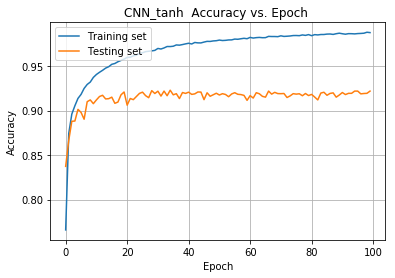

In [16]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_act_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_mdata.history['val_accuracy'])
plt.title('CNN_tanh  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

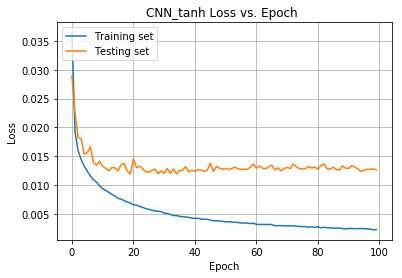

In [17]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_act_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_mdata.history['val_loss'])
plt.title('CNN_tanh Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: The test accuracy is better with signmoid activation function as compared to softmax.
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: No
  
2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: Cross-entropy is a function of probability whcih ranges from 0 to 1 whereas, tanh is in range -1 to 1.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: Sigmoid rnges from 0 to 1 which works well with cross-entropy since it's a function of probability. 


##Part 5.3 : Bonus

In [ ]:
#Create and train model architecture
def CNN_activation(act):
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    # Layer 1
    model.add(Conv2D(256, (3, 3), activation=acti, input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
    # Layer 3
    model.add(Conv2D(128, (3, 3),activation=acti))
    model.add(Dropout(0.3))
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
    # Layer 5
    model.add(Flatten())
    # FC Layer 1
    model.add(Dense(100, activation=acti,kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation=acti,kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))  
    return model

In [ ]:
########## Sigmoid activation ##########

#Create instance of CNN model graph
act_sig = CNN_activation("sigmoid")
#Compile model using an appropriate loss and optimizer algorithm
act_sig.compile(loss="mean_squared_error",metrics=['accuracy'],optimizer="adam")
#Train the model and assign training meta-data to a variable
hist = act_sig.fit(data_train, labels_train,validation_data=(data_test, labels_test),shuffle=True,epochs=100,batch_size=1536, verbose=2) 
#Print accuracy of model on testing set after training 
[test_loss,test_acc] = act_sig.evaluate(data_test, labels_test, batch_size = 512, verbose=1)
print("Test Accuracy with Sigmoid: {:0.2f}%".format(test_acc*100))

# plots for sigmoid
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()

# accuracy
ax1.plot(range(1,101),hist.history['accuracy'])
ax1.plot(range(1,101),hist.history['val_accuracy'])
ax1.set_title("Accuracy vs Epoch")
ax1.set_xlabel("Epochs")
ax1.set_ylim(0,1)
ax1.set_ylabel("Accuracy")
ax1.legend(['Training set','Testing set'])
ax1.grid(True)

# loss
ax2.plot(range(1,101),hist.history['loss'])
ax2.plot(range(1,101),hist.history['val_loss'])
ax2.set_title("Loss vs Epoch")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Training set','Validation Loss'])
ax2.grid(True)

Train on 60000 samples, validate on 10000 samples


Epoch 1/100
 - 20s - loss: 0.0900 - accuracy: 0.1015 - val_loss: 0.0900 - val_accuracy: 0.1000

Epoch 2/100
 - 20s - loss: 0.0900 - accuracy: 0.0979 - val_loss: 0.0900 - val_accuracy: 0.1000

Epoch 3/100
 - 20s - loss: 0.0900 - accuracy: 0.0976 - val_loss: 0.0900 - val_accuracy: 0.1000

Epoch 4/100
 - 20s - loss: 0.0900 - accuracy: 0.1047 - val_loss: 0.0900 - val_accuracy: 0.1000

Epoch 5/100
 - 20s - loss: 0.0869 - accuracy: 0.2976 - val_loss: 0.0774 - val_accuracy: 0.4151

Epoch 6/100
 - 20s - loss: 0.0619 - accuracy: 0.5433 - val_loss: 0.0542 - val_accuracy: 0.5899

Epoch 7/100
 - 20s - loss: 0.0450 - accuracy: 0.6847 - val_loss: 0.0412 - val_accuracy: 0.7020

Epoch 8/100
 - 20s - loss: 0.0372 - accuracy: 0.7349 - val_loss: 0.0403 - val_accuracy: 0.7003

Epoch 9/100
 - 20s - loss: 0.0335 - accuracy: 0.7570 - val_loss: 0.0339 - val_accuracy: 0.7544

Epoch 10/100
 - 20s - loss: 0.0317 - accuracy: 0.7670 - val_loss: 0.0323 - val_accuracy: 0.7643

Epoch 11/100
 - 20s - loss: 0.0299 - accuracy: 0.7814 - val_loss: 0.0355 - val_accuracy: 0.7271

Epoch 12/100
 - 20s - loss: 0.0287 - accuracy: 0.7892 - val_loss: 0.0320 - val_accuracy: 0.7666

Epoch 13/100
 - 20s - loss: 0.0276 - accuracy: 0.8012 - val_loss: 0.0297 - val_accuracy: 0.7857

Epoch 14/100
 - 20s - loss: 0.0264 - accuracy: 0.8098 - val_loss: 0.0295 - val_accuracy: 0.7889

Epoch 15/100
 - 20s - loss: 0.0259 - accuracy: 0.8151 - val_loss: 0.0274 - val_accuracy: 0.8006

Epoch 16/100
 - 20s - loss: 0.0253 - accuracy: 0.8193 - val_loss: 0.0264 - val_accuracy: 0.8132

Epoch 17/100
 - 20s - loss: 0.0246 - accuracy: 0.8250 - val_loss: 0.0263 - val_accuracy: 0.8129

Epoch 18/100
 - 20s - loss: 0.0242 - accuracy: 0.8282 - val_loss: 0.0263 - val_accuracy: 0.8127

Epoch 19/100
 - 20s - loss: 0.0234 - accuracy: 0.8344 - val_loss: 0.0251 - val_accuracy: 0.8215

Epoch 20/100
 - 20s - loss: 0.0229 - accuracy: 0.8392 - val_loss: 0.0246 - val_accuracy: 0.8267

Epoch 21/100
 - 20s - loss: 0.0228 - accuracy: 0.8388 - val_loss: 0.0242 - val_accuracy: 0.8280

Epoch 22/100
 - 20s - loss: 0.0217 - accuracy: 0.8479 - val_loss: 0.0235 - val_accuracy: 0.8349

Epoch 23/100
 - 20s - loss: 0.0215 - accuracy: 0.8484 - val_loss: 0.0242 - val_accuracy: 0.8303

Epoch 24/100
 - 20s - loss: 0.0210 - accuracy: 0.8531 - val_loss: 0.0242 - val_accuracy: 0.8268

Epoch 25/100
 - 20s - loss: 0.0207 - accuracy: 0.8560 - val_loss: 0.0223 - val_accuracy: 0.8414

Epoch 26/100
 - 20s - loss: 0.0203 - accuracy: 0.8578 - val_loss: 0.0218 - val_accuracy: 0.8461

Epoch 27/100
 - 20s - loss: 0.0199 - accuracy: 0.8613 - val_loss: 0.0226 - val_accuracy: 0.8398

Epoch 28/100
 - 20s - loss: 0.0195 - accuracy: 0.8652 - val_loss: 0.0223 - val_accuracy: 0.8428

Epoch 29/100
 - 20s - loss: 0.0194 - accuracy: 0.8655 - val_loss: 0.0220 - val_accuracy: 0.8431

Epoch 30/100
 - 20s - loss: 0.0192 - accuracy: 0.8671 - val_loss: 0.0223 - val_accuracy: 0.8410

Epoch 31/100
 - 20s - loss: 0.0187 - accuracy: 0.8709 - val_loss: 0.0244 - val_accuracy: 0.8242

Epoch 32/100
 - 20s - loss: 0.0188 - accuracy: 0.8700 - val_loss: 0.0215 - val_accuracy: 0.8471

Epoch 33/100
 - 20s - loss: 0.0184 - accuracy: 0.8713 - val_loss: 0.0197 - val_accuracy: 0.8620

Epoch 34/100
 - 20s - loss: 0.0182 - accuracy: 0.8740 - val_loss: 0.0221 - val_accuracy: 0.8430

Epoch 35/100
 - 20s - loss: 0.0183 - accuracy: 0.8731 - val_loss: 0.0211 - val_accuracy: 0.8490

Epoch 36/100
 - 20s - loss: 0.0178 - accuracy: 0.8781 - val_loss: 0.0220 - val_accuracy: 0.8460

Epoch 37/100
 - 20s - loss: 0.0180 - accuracy: 0.8758 - val_loss: 0.0194 - val_accuracy: 0.8656

Epoch 38/100
 - 20s - loss: 0.0173 - accuracy: 0.8803 - val_loss: 0.0199 - val_accuracy: 0.8613

Epoch 39/100
 - 20s - loss: 0.0175 - accuracy: 0.8783 - val_loss: 0.0225 - val_accuracy: 0.8411

Epoch 40/100
 - 20s - loss: 0.0174 - accuracy: 0.8794 - val_loss: 0.0193 - val_accuracy: 0.8652

Epoch 41/100
 - 20s - loss: 0.0168 - accuracy: 0.8845 - val_loss: 0.0194 - val_accuracy: 0.8625

Epoch 42/100
 - 20s - loss: 0.0168 - accuracy: 0.8840 - val_loss: 0.0190 - val_accuracy: 0.8646

Epoch 43/100
 - 20s - loss: 0.0168 - accuracy: 0.8852 - val_loss: 0.0195 - val_accuracy: 0.8640

Epoch 44/100
 - 20s - loss: 0.0167 - accuracy: 0.8839 - val_loss: 0.0211 - val_accuracy: 0.8490

Epoch 45/100
 - 20s - loss: 0.0165 - accuracy: 0.8874 - val_loss: 0.0210 - val_accuracy: 0.8526

Epoch 46/100
 - 20s - loss: 0.0164 - accuracy: 0.8875 - val_loss: 0.0210 - val_accuracy: 0.8514

Epoch 47/100
 - 20s - loss: 0.0164 - accuracy: 0.8865 - val_loss: 0.0191 - val_accuracy: 0.8632

Epoch 48/100
 - 20s - loss: 0.0161 - accuracy: 0.8897 - val_loss: 0.0188 - val_accuracy: 0.8688

Epoch 49/100
 - 20s - loss: 0.0158 - accuracy: 0.8919 - val_loss: 0.0184 - val_accuracy: 0.8694

Epoch 50/100
 - 20s - loss: 0.0159 - accuracy: 0.8911 - val_loss: 0.0200 - val_accuracy: 0.8594

Epoch 51/100
 - 20s - loss: 0.0159 - accuracy: 0.8924 - val_loss: 0.0213 - val_accuracy: 0.8507

Epoch 52/100
 - 20s - loss: 0.0159 - accuracy: 0.8910 - val_loss: 0.0184 - val_accuracy: 0.8722

Epoch 53/100
 - 20s - loss: 0.0156 - accuracy: 0.8937 - val_loss: 0.0191 - val_accuracy: 0.8650

Epoch 54/100
 - 20s - loss: 0.0155 - accuracy: 0.8941 - val_loss: 0.0179 - val_accuracy: 0.8752

Epoch 55/100
 - 20s - loss: 0.0156 - accuracy: 0.8937 - val_loss: 0.0183 - val_accuracy: 0.8726

Epoch 56/100
 - 20s - loss: 0.0155 - accuracy: 0.8949 - val_loss: 0.0187 - val_accuracy: 0.8690

Epoch 57/100
 - 20s - loss: 0.0150 - accuracy: 0.8979 - val_loss: 0.0195 - val_accuracy: 0.8630

Epoch 58/100
 - 20s - loss: 0.0152 - accuracy: 0.8952 - val_loss: 0.0211 - val_accuracy: 0.8515

Epoch 59/100
 - 20s - loss: 0.0154 - accuracy: 0.8938 - val_loss: 0.0192 - val_accuracy: 0.8644

Epoch 60/100
 - 20s - loss: 0.0150 - accuracy: 0.8982 - val_loss: 0.0198 - val_accuracy: 0.8604

Epoch 61/100
 - 20s - loss: 0.0152 - accuracy: 0.8964 - val_loss: 0.0177 - val_accuracy: 0.8763

Epoch 62/100
 - 20s - loss: 0.0148 - accuracy: 0.8992 - val_loss: 0.0179 - val_accuracy: 0.8749

Epoch 63/100
 - 20s - loss: 0.0146 - accuracy: 0.9007 - val_loss: 0.0184 - val_accuracy: 0.8715

Epoch 64/100
 - 20s - loss: 0.0144 - accuracy: 0.9023 - val_loss: 0.0179 - val_accuracy: 0.8753

Epoch 65/100
 - 20s - loss: 0.0144 - accuracy: 0.9017 - val_loss: 0.0187 - val_accuracy: 0.8703

Epoch 66/100
 - 20s - loss: 0.0145 - accuracy: 0.9013 - val_loss: 0.0181 - val_accuracy: 0.8736

Epoch 67/100
 - 20s - loss: 0.0145 - accuracy: 0.9013 - val_loss: 0.0181 - val_accuracy: 0.8771

Epoch 68/100
 - 20s - loss: 0.0145 - accuracy: 0.9027 - val_loss: 0.0171 - val_accuracy: 0.8814

Epoch 69/100
 - 20s - loss: 0.0141 - accuracy: 0.9047 - val_loss: 0.0195 - val_accuracy: 0.8634

Epoch 70/100
 - 20s - loss: 0.0143 - accuracy: 0.9023 - val_loss: 0.0175 - val_accuracy: 0.8767

Epoch 71/100
 - 20s - loss: 0.0141 - accuracy: 0.9051 - val_loss: 0.0174 - val_accuracy: 0.8779

Epoch 72/100
 - 20s - loss: 0.0139 - accuracy: 0.9071 - val_loss: 0.0178 - val_accuracy: 0.8778

Epoch 73/100
 - 20s - loss: 0.0138 - accuracy: 0.9057 - val_loss: 0.0175 - val_accuracy: 0.8789

Epoch 74/100
 - 20s - loss: 0.0137 - accuracy: 0.9071 - val_loss: 0.0170 - val_accuracy: 0.8805

Epoch 75/100
 - 20s - loss: 0.0136 - accuracy: 0.9083 - val_loss: 0.0166 - val_accuracy: 0.8853

Epoch 76/100
 - 20s - loss: 0.0138 - accuracy: 0.9062 - val_loss: 0.0170 - val_accuracy: 0.8820

Epoch 77/100
 - 20s - loss: 0.0133 - accuracy: 0.9109 - val_loss: 0.0178 - val_accuracy: 0.8730

Epoch 78/100
 - 20s - loss: 0.0136 - accuracy: 0.9085 - val_loss: 0.0180 - val_accuracy: 0.8718

Epoch 79/100
 - 20s - loss: 0.0135 - accuracy: 0.9097 - val_loss: 0.0168 - val_accuracy: 0.8844

Epoch 80/100
 - 20s - loss: 0.0133 - accuracy: 0.9101 - val_loss: 0.0183 - val_accuracy: 0.8725

Epoch 81/100
 - 20s - loss: 0.0132 - accuracy: 0.9101 - val_loss: 0.0178 - val_accuracy: 0.8745

Epoch 82/100
 - 20s - loss: 0.0131 - accuracy: 0.9124 - val_loss: 0.0165 - val_accuracy: 0.8844

Epoch 83/100
 - 20s - loss: 0.0129 - accuracy: 0.9150 - val_loss: 0.0169 - val_accuracy: 0.8806

Epoch 84/100
 - 20s - loss: 0.0129 - accuracy: 0.9130 - val_loss: 0.0174 - val_accuracy: 0.8767

Epoch 85/100
 - 20s - loss: 0.0131 - accuracy: 0.9113 - val_loss: 0.0166 - val_accuracy: 0.8828

Epoch 86/100
 - 20s - loss: 0.0128 - accuracy: 0.9143 - val_loss: 0.0186 - val_accuracy: 0.8706

Epoch 87/100
 - 20s - loss: 0.0128 - accuracy: 0.9144 - val_loss: 0.0166 - val_accuracy: 0.8843

Epoch 88/100
 - 20s - loss: 0.0127 - accuracy: 0.9151 - val_loss: 0.0173 - val_accuracy: 0.8792

Epoch 89/100
 - 20s - loss: 0.0128 - accuracy: 0.9147 - val_loss: 0.0174 - val_accuracy: 0.8769

Epoch 90/100
 - 20s - loss: 0.0127 - accuracy: 0.9153 - val_loss: 0.0166 - val_accuracy: 0.8841

Epoch 91/100
 - 20s - loss: 0.0128 - accuracy: 0.9132 - val_loss: 0.0175 - val_accuracy: 0.8765

Epoch 92/100
 - 20s - loss: 0.0124 - accuracy: 0.9168 - val_loss: 0.0161 - val_accuracy: 0.8889

Epoch 93/100
 - 20s - loss: 0.0122 - accuracy: 0.9180 - val_loss: 0.0163 - val_accuracy: 0.8865

Epoch 94/100
 - 20s - loss: 0.0125 - accuracy: 0.9165 - val_loss: 0.0162 - val_accuracy: 0.8870

Epoch 95/100
 - 20s - loss: 0.0126 - accuracy: 0.9162 - val_loss: 0.0163 - val_accuracy: 0.8870

Epoch 96/100
 - 20s - loss: 0.0122 - accuracy: 0.9185 - val_loss: 0.0163 - val_accuracy: 0.8842

Epoch 97/100
 - 20s - loss: 0.0121 - accuracy: 0.9194 - val_loss: 0.0187 - val_accuracy: 0.8672

Epoch 98/100
 - 20s - loss: 0.0127 - accuracy: 0.9137 - val_loss: 0.0163 - val_accuracy: 0.8869

Epoch 99/100
 - 20s - loss: 0.0120 - accuracy: 0.9204 - val_loss: 0.0165 - val_accuracy: 0.8866

Epoch 100/100
 - 20s - loss: 0.0122 - accuracy: 0.9190 - val_loss: 0.0161 - val_accuracy: 0.8886

10000/10000 [==============================] - 1s 115us/step

Test Accuracy with Sigmoid: 88.86%


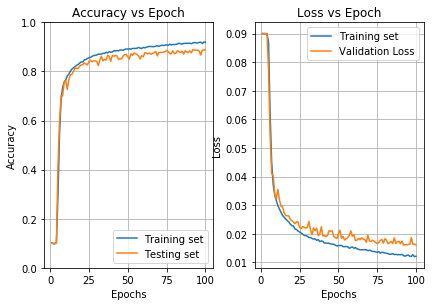

In [ ]:
########## Tanh activation ##########

#Create instance of CNN model graph
act_tanh = CNN_activation("tanh")
#Compile model using an appropriate loss and optimizer algorithm
act_tanh.compile(loss="mean_squared_error",metrics=['accuracy'],optimizer="adam")
#Train the model and assign training meta-data to a variable
hist = act_tanh.fit(data_train, labels_train,validation_data=(data_test, labels_test),shuffle=True,epochs=100,batch_size=1536, verbose=2) 
#Print accuracy of model on testing set after training 
[test_loss,test_acc] = act_tanh.evaluate(data_test, labels_test, batch_size = 512, verbose=1)
print("Test Accuracy with Tanh: {:0.2f}%".format(test_acc*100))

# plots for sigmoid
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()

# accuracy
ax1.plot(range(1,101),hist.history['accuracy'])
ax1.plot(range(1,101),hist.history['val_accuracy'])
ax1.set_title("Accuracy vs Epoch")
ax1.set_xlabel("Epochs")
ax1.set_ylim(0,1)
ax1.set_ylabel("Accuracy")
ax1.legend(['Training set','Testing set'])
ax1.grid(True)

# loss
ax2.plot(range(1,101),hist.history['loss'])
ax2.plot(range(1,101),hist.history['val_loss'])
ax2.set_title("Loss vs Epoch")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Training set','Testing set'])
ax2.grid(True)

Train on 60000 samples, validate on 10000 samples

Epoch 1/100
 - 28s - loss: 0.0534 - accuracy: 0.6241 - val_loss: 0.0392 - val_accuracy: 0.7210

Epoch 2/100
 - 20s - loss: 0.0278 - accuracy: 0.8010 - val_loss: 0.0335 - val_accuracy: 0.7607

Epoch 3/100
 - 20s - loss: 0.0230 - accuracy: 0.8395 - val_loss: 0.0289 - val_accuracy: 0.7982

Epoch 4/100
 - 20s - loss: 0.0201 - accuracy: 0.8608 - val_loss: 0.0280 - val_accuracy: 0.8016

Epoch 5/100
 - 20s - loss: 0.0186 - accuracy: 0.8712 - val_loss: 0.0251 - val_accuracy: 0.8269

Epoch 6/100
 - 20s - loss: 0.0182 - accuracy: 0.8752 - val_loss: 0.0250 - val_accuracy: 0.8234

Epoch 7/100
 - 20s - loss: 0.0164 - accuracy: 0.8873 - val_loss: 0.0260 - val_accuracy: 0.8154

Epoch 8/100
 - 20s - loss: 0.0157 - accuracy: 0.8913 - val_loss: 0.0228 - val_accuracy: 0.8386

Epoch 9/100
 - 20s - loss: 0.0153 - accuracy: 0.8957 - val_loss: 0.0196 - val_accuracy: 0.8647

Epoch 10/100
 - 20s - loss: 0.0148 - accuracy: 0.8989 - val_loss: 0.0243 - val_accuracy: 0.8306

Epoch 11/100
 - 20s - loss: 0.0146 - accuracy: 0.8997 - val_loss: 0.0207 - val_accuracy: 0.8580

Epoch 12/100
 - 20s - loss: 0.0139 - accuracy: 0.9047 - val_loss: 0.0194 - val_accuracy: 0.8669

Epoch 13/100
 - 20s - loss: 0.0135 - accuracy: 0.9081 - val_loss: 0.0202 - val_accuracy: 0.8594

Epoch 14/100
 - 20s - loss: 0.0133 - accuracy: 0.9081 - val_loss: 0.0197 - val_accuracy: 0.8641

Epoch 15/100
 - 20s - loss: 0.0127 - accuracy: 0.9128 - val_loss: 0.0199 - val_accuracy: 0.8621

Epoch 16/100
 - 20s - loss: 0.0125 - accuracy: 0.9154 - val_loss: 0.0195 - val_accuracy: 0.8638

Epoch 17/100
 - 20s - loss: 0.0123 - accuracy: 0.9170 - val_loss: 0.0187 - val_accuracy: 0.8693

Epoch 18/100
 - 20s - loss: 0.0120 - accuracy: 0.9178 - val_loss: 0.0194 - val_accuracy: 0.8642

Epoch 19/100
 - 20s - loss: 0.0117 - accuracy: 0.9206 - val_loss: 0.0195 - val_accuracy: 0.8634

Epoch 20/100
 - 20s - loss: 0.0115 - accuracy: 0.9226 - val_loss: 0.0206 - val_accuracy: 0.8548

Epoch 21/100
 - 20s - loss: 0.0114 - accuracy: 0.9230 - val_loss: 0.0176 - val_accuracy: 0.8788

Epoch 22/100
 - 20s - loss: 0.0111 - accuracy: 0.9259 - val_loss: 0.0194 - val_accuracy: 0.8645

Epoch 23/100
 - 20s - loss: 0.0106 - accuracy: 0.9293 - val_loss: 0.0176 - val_accuracy: 0.8749

Epoch 24/100
 - 20s - loss: 0.0104 - accuracy: 0.9302 - val_loss: 0.0219 - val_accuracy: 0.8512

Epoch 25/100
 - 20s - loss: 0.0111 - accuracy: 0.9253 - val_loss: 0.0164 - val_accuracy: 0.8898

Epoch 26/100
 - 20s - loss: 0.0098 - accuracy: 0.9358 - val_loss: 0.0174 - val_accuracy: 0.8811

Epoch 27/100
 - 20s - loss: 0.0100 - accuracy: 0.9334 - val_loss: 0.0161 - val_accuracy: 0.8918

Epoch 28/100
 - 20s - loss: 0.0103 - accuracy: 0.9312 - val_loss: 0.0167 - val_accuracy: 0.8888

Epoch 29/100
 - 20s - loss: 0.0096 - accuracy: 0.9365 - val_loss: 0.0160 - val_accuracy: 0.8906

Epoch 30/100
 - 20s - loss: 0.0095 - accuracy: 0.9379 - val_loss: 0.0167 - val_accuracy: 0.8845

Epoch 31/100
 - 20s - loss: 0.0093 - accuracy: 0.9389 - val_loss: 0.0164 - val_accuracy: 0.8898

Epoch 32/100
 - 20s - loss: 0.0091 - accuracy: 0.9403 - val_loss: 0.0166 - val_accuracy: 0.8866

Epoch 33/100
 - 20s - loss: 0.0093 - accuracy: 0.9389 - val_loss: 0.0161 - val_accuracy: 0.8901

Epoch 34/100
 - 20s - loss: 0.0087 - accuracy: 0.9437 - val_loss: 0.0171 - val_accuracy: 0.8829

Epoch 35/100
 - 20s - loss: 0.0086 - accuracy: 0.9440 - val_loss: 0.0164 - val_accuracy: 0.8908

Epoch 36/100
 - 20s - loss: 0.0085 - accuracy: 0.9443 - val_loss: 0.0164 - val_accuracy: 0.8875

Epoch 37/100
 - 20s - loss: 0.0086 - accuracy: 0.9437 - val_loss: 0.0164 - val_accuracy: 0.8869

Epoch 38/100
 - 20s - loss: 0.0081 - accuracy: 0.9473 - val_loss: 0.0165 - val_accuracy: 0.8892

Epoch 39/100
 - 20s - loss: 0.0082 - accuracy: 0.9469 - val_loss: 0.0164 - val_accuracy: 0.8910

Epoch 40/100
 - 20s - loss: 0.0079 - accuracy: 0.9487 - val_loss: 0.0153 - val_accuracy: 0.8963

Epoch 41/100
 - 20s - loss: 0.0077 - accuracy: 0.9498 - val_loss: 0.0162 - val_accuracy: 0.8903

Epoch 42/100
 - 20s - loss: 0.0079 - accuracy: 0.9484 - val_loss: 0.0162 - val_accuracy: 0.8914

Epoch 43/100
 - 20s - loss: 0.0075 - accuracy: 0.9517 - val_loss: 0.0159 - val_accuracy: 0.8941

Epoch 44/100
 - 20s - loss: 0.0073 - accuracy: 0.9528 - val_loss: 0.0163 - val_accuracy: 0.8905

Epoch 45/100
 - 20s - loss: 0.0074 - accuracy: 0.9521 - val_loss: 0.0153 - val_accuracy: 0.8960

Epoch 46/100
 - 20s - loss: 0.0074 - accuracy: 0.9522 - val_loss: 0.0181 - val_accuracy: 0.8782

Epoch 47/100
 - 20s - loss: 0.0073 - accuracy: 0.9532 - val_loss: 0.0156 - val_accuracy: 0.8963

Epoch 48/100
 - 20s - loss: 0.0071 - accuracy: 0.9542 - val_loss: 0.0156 - val_accuracy: 0.8973

Epoch 49/100
 - 20s - loss: 0.0071 - accuracy: 0.9536 - val_loss: 0.0158 - val_accuracy: 0.8975

Epoch 50/100
 - 20s - loss: 0.0068 - accuracy: 0.9562 - val_loss: 0.0164 - val_accuracy: 0.8919

Epoch 51/100
 - 20s - loss: 0.0073 - accuracy: 0.9527 - val_loss: 0.0152 - val_accuracy: 0.8989

Epoch 52/100
 - 20s - loss: 0.0067 - accuracy: 0.9570 - val_loss: 0.0151 - val_accuracy: 0.8991

Epoch 53/100
 - 20s - loss: 0.0064 - accuracy: 0.9598 - val_loss: 0.0153 - val_accuracy: 0.9005

Epoch 54/100
 - 20s - loss: 0.0061 - accuracy: 0.9611 - val_loss: 0.0157 - val_accuracy: 0.8965

Epoch 55/100
 - 20s - loss: 0.0061 - accuracy: 0.9614 - val_loss: 0.0159 - val_accuracy: 0.8967

Epoch 56/100
 - 20s - loss: 0.0062 - accuracy: 0.9603 - val_loss: 0.0171 - val_accuracy: 0.8880

Epoch 57/100
 - 20s - loss: 0.0063 - accuracy: 0.9607 - val_loss: 0.0158 - val_accuracy: 0.8945

Epoch 58/100
 - 20s - loss: 0.0062 - accuracy: 0.9606 - val_loss: 0.0158 - val_accuracy: 0.8936

Epoch 59/100
 - 20s - loss: 0.0057 - accuracy: 0.9639 - val_loss: 0.0161 - val_accuracy: 0.8945

Epoch 60/100
 - 20s - loss: 0.0060 - accuracy: 0.9619 - val_loss: 0.0159 - val_accuracy: 0.8971

Epoch 61/100
 - 20s - loss: 0.0059 - accuracy: 0.9634 - val_loss: 0.0160 - val_accuracy: 0.8948

Epoch 62/100
 - 20s - loss: 0.0058 - accuracy: 0.9633 - val_loss: 0.0159 - val_accuracy: 0.8981

Epoch 63/100
 - 20s - loss: 0.0061 - accuracy: 0.9603 - val_loss: 0.0164 - val_accuracy: 0.8935

Epoch 64/100
 - 20s - loss: 0.0057 - accuracy: 0.9635 - val_loss: 0.0169 - val_accuracy: 0.8907

Epoch 65/100
 - 20s - loss: 0.0054 - accuracy: 0.9663 - val_loss: 0.0163 - val_accuracy: 0.8948

Epoch 66/100
 - 20s - loss: 0.0052 - accuracy: 0.9679 - val_loss: 0.0166 - val_accuracy: 0.8942

Epoch 67/100
 - 20s - loss: 0.0054 - accuracy: 0.9664 - val_loss: 0.0156 - val_accuracy: 0.9009

Epoch 68/100
 - 20s - loss: 0.0055 - accuracy: 0.9653 - val_loss: 0.0167 - val_accuracy: 0.8943

Epoch 69/100
 - 20s - loss: 0.0055 - accuracy: 0.9657 - val_loss: 0.0157 - val_accuracy: 0.8981

Epoch 70/100
 - 20s - loss: 0.0054 - accuracy: 0.9657 - val_loss: 0.0155 - val_accuracy: 0.9008

Epoch 71/100
 - 20s - loss: 0.0050 - accuracy: 0.9684 - val_loss: 0.0158 - val_accuracy: 0.8988

Epoch 72/100
 - 20s - loss: 0.0052 - accuracy: 0.9671 - val_loss: 0.0172 - val_accuracy: 0.8907

Epoch 73/100
 - 20s - loss: 0.0056 - accuracy: 0.9644 - val_loss: 0.0159 - val_accuracy: 0.8970

Epoch 74/100
 - 20s - loss: 0.0051 - accuracy: 0.9678 - val_loss: 0.0163 - val_accuracy: 0.8964

Epoch 75/100
 - 20s - loss: 0.0046 - accuracy: 0.9713 - val_loss: 0.0160 - val_accuracy: 0.8979

Epoch 76/100
 - 20s - loss: 0.0045 - accuracy: 0.9717 - val_loss: 0.0156 - val_accuracy: 0.9014

Epoch 77/100
 - 20s - loss: 0.0044 - accuracy: 0.9722 - val_loss: 0.0166 - val_accuracy: 0.8929

Epoch 78/100
 - 20s - loss: 0.0049 - accuracy: 0.9688 - val_loss: 0.0169 - val_accuracy: 0.8920

Epoch 79/100
 - 20s - loss: 0.0046 - accuracy: 0.9715 - val_loss: 0.0162 - val_accuracy: 0.8967

Epoch 80/100
 - 20s - loss: 0.0043 - accuracy: 0.9736 - val_loss: 0.0167 - val_accuracy: 0.8949

Epoch 81/100
 - 20s - loss: 0.0052 - accuracy: 0.9675 - val_loss: 0.0158 - val_accuracy: 0.8993

Epoch 82/100
 - 20s - loss: 0.0048 - accuracy: 0.9697 - val_loss: 0.0164 - val_accuracy: 0.8958

Epoch 83/100
 - 20s - loss: 0.0046 - accuracy: 0.9709 - val_loss: 0.0161 - val_accuracy: 0.8973

Epoch 84/100
 - 20s - loss: 0.0046 - accuracy: 0.9717 - val_loss: 0.0168 - val_accuracy: 0.8943

Epoch 85/100
 - 20s - loss: 0.0046 - accuracy: 0.9710 - val_loss: 0.0162 - val_accuracy: 0.8983

Epoch 86/100
 - 20s - loss: 0.0043 - accuracy: 0.9729 - val_loss: 0.0162 - val_accuracy: 0.8976

Epoch 87/100
 - 20s - loss: 0.0042 - accuracy: 0.9739 - val_loss: 0.0160 - val_accuracy: 0.8980

Epoch 88/100
 - 20s - loss: 0.0041 - accuracy: 0.9744 - val_loss: 0.0160 - val_accuracy: 0.9008

Epoch 89/100
 - 20s - loss: 0.0042 - accuracy: 0.9741 - val_loss: 0.0176 - val_accuracy: 0.8903

Epoch 90/100
 - 20s - loss: 0.0044 - accuracy: 0.9732 - val_loss: 0.0165 - val_accuracy: 0.8961

Epoch 91/100
 - 20s - loss: 0.0043 - accuracy: 0.9734 - val_loss: 0.0161 - val_accuracy: 0.8991

Epoch 92/100
 - 20s - loss: 0.0043 - accuracy: 0.9736 - val_loss: 0.0157 - val_accuracy: 0.9006

Epoch 93/100
 - 20s - loss: 0.0042 - accuracy: 0.9738 - val_loss: 0.0174 - val_accuracy: 0.8920

Epoch 94/100
 - 20s - loss: 0.0043 - accuracy: 0.9735 - val_loss: 0.0161 - val_accuracy: 0.8999

Epoch 95/100
 - 20s - loss: 0.0040 - accuracy: 0.9754 - val_loss: 0.0167 - val_accuracy: 0.8953

Epoch 96/100
 - 20s - loss: 0.0039 - accuracy: 0.9755 - val_loss: 0.0164 - val_accuracy: 0.8959

Epoch 97/100
 - 20s - loss: 0.0038 - accuracy: 0.9765 - val_loss: 0.0168 - val_accuracy: 0.8948

Epoch 98/100
 - 20s - loss: 0.0040 - accuracy: 0.9752 - val_loss: 0.0164 - val_accuracy: 0.8988

Epoch 99/100
 - 20s - loss: 0.0042 - accuracy: 0.9737 - val_loss: 0.0166 - val_accuracy: 0.8964

Epoch 100/100
 - 20s - loss: 0.0040 - accuracy: 0.9748 - val_loss: 0.0166 - val_accuracy: 0.8959
 
10000/10000 [==============================] - 1s 121us/step

Test Accuracy with Tanh: 89.59%


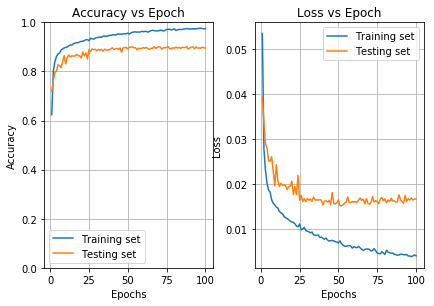

**QUESTION 3a**

Question: Change hidden units to sigmoid and tanh and report the accuracy and loss plots for the training and testing sets?

Answer:

Sigmoid: Training loss = 0.0122; Training accuracy = 91.9 %; Testing accuracy = 88.86 %

Tanh: Training loss = 0.004; Training accuracy = 97.488.57 %; Testing accuracy = 89.59 %

## Part 5.3 Inactive Neurons

In [51]:
from keras.layers import ReLU
    
#Create and train model architecture
def CNN_relu_active():
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    # Layer 1
    model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
    # Layer 3
    model.add(Conv2D(128, (3, 3)))
    model.add(ReLU())
    model.add(Dropout(0.3))
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
    # Layer 5
    model.add(Flatten())
    # FC Layer 1
    model.add(Dense(100, activation='relu',kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation='relu',kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))  
    return model

In [52]:
#Create instance of CNN model graph
act_relu = CNN_relu_active()
# act_relu.summary()
act_relu.layers[4].get_weights()

[]

In [53]:
#Compile model using an appropriate loss and optimizer algorithm
act_relu.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer="adam")
#Train the model and assign training meta-data to a variable
hist = act_relu.fit(data_train, labels_train,
                    validation_data=(data_test, labels_test),
                    shuffle=True,
                    epochs=50,
                    batch_size=1536, 
                    verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 22s - loss: 1.1274 - accuracy: 0.6029 - val_loss: 0.8801 - val_accuracy: 0.7035
Epoch 2/50
 - 20s - loss: 0.6067 - accuracy: 0.7693 - val_loss: 0.6670 - val_accuracy: 0.7744
Epoch 3/50
 - 20s - loss: 0.4989 - accuracy: 0.8131 - val_loss: 0.5830 - val_accuracy: 0.8298
Epoch 4/50
 - 20s - loss: 0.4416 - accuracy: 0.8372 - val_loss: 0.5275 - val_accuracy: 0.8376
Epoch 5/50
 - 20s - loss: 0.4021 - accuracy: 0.8542 - val_loss: 0.4737 - val_accuracy: 0.8525
Epoch 6/50
 - 20s - loss: 0.3722 - accuracy: 0.8665 - val_loss: 0.5293 - val_accuracy: 0.8084
Epoch 7/50
 - 20s - loss: 0.3732 - accuracy: 0.8644 - val_loss: 0.4380 - val_accuracy: 0.8683
Epoch 8/50
 - 20s - loss: 0.3393 - accuracy: 0.8781 - val_loss: 0.4263 - val_accuracy: 0.8700
Epoch 9/50
 - 20s - loss: 0.3276 - accuracy: 0.8810 - val_loss: 0.4020 - val_accuracy: 0.8784
Epoch 10/50
 - 20s - loss: 0.3158 - accuracy: 0.8860 - val_loss: 0.4040 - val_accuracy: 0.8811
Epoch 11/

In [54]:

# count number of neurons in convolution layer just before relu
total_neuron_input_for_relu = act_relu.layers[3].get_weights()[0].size

# count the negative inputs for the relu - these neurons will be inactive
total_neuron_negative_for_relu = np.sum(act_relu.layers[3].get_weights()[0] > 0)

print("Total percentage of neurons inactive at 50th epoch: {:0.2f}%".format(100*total_neuron_negative_for_relu/total_neuron_input_for_relu))

Total percentage of neurons inactive at 50th epoch: 48.00%


In [55]:
#Print accuracy of model on testing set after training 
[test_loss,test_acc] = act_relu.evaluate(data_test, labels_test, batch_size = 512, verbose=1)
print("Test Accuracy with Tanh : {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 1s 122us/step
Test Accuracy with Tanh : 91.27%


**QUESTION 3b**

Question: When using ReLU hidden layer activations, compare average activity [number of active neurons] in layers during training and testing?

Answer: 52% neurons were active during Training and 100% were active during testing.

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
!wget --no-check-certificate -O RML2016.10b.tar.bz2 https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919030207_ad33c1a5c1ec6e66ff7c4dc8_ecb6e88188ff3a074dfed17097d966a1ebc2073b_002_20210919040207_0027_dnld
# http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

RML2016.10b.dat
LICENSE.TXT


In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    # 1: 2-D Convolution Layer with 256 feature and 1*3 filter Size
    model.add(Conv2D(256,(1,3),activation='relu',input_shape=(2,128,1)))

    # 1.1: Dropout 20%
    model.add(Dropout(0.20))

    # 2: 2-D Convolution Layer with 256 feature and 2*3 filter Size
    model.add(Conv2D(256,(2,3),activation='relu'))

    # 3: 2-D Convolution Layer with 80 feature and 1*3 filter Size
    model.add(Conv2D(80,(1,3),activation='relu'))

    # 3.1: Dropout 20%
    model.add(Dropout(0.20))

    # 4: 2-D Convolution Layer with 80 feature and 1*3 filter Size
    model.add(Conv2D(80,(1,3),activation='relu'))

    # 4.5: Reshape to 2-D
    model.add(Reshape((120,80)))
    # 5: LSTM
    model.add(LSTM(50))

    # 6: Fully Coonnected Layer with 128  perceptrons
    model.add(Dense(128, activation='relu',kernel_initializer='normal'))

    # 6: Fully Coonnected Layer with 100  perceptrons
    model.add(Dense(10, activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_cldnn.compile(loss= 'categorical_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_cldnn_mdata = CNN_cldnn.fit(X_train,Y_train,
                                  batch_size=2048,
                                  epochs=100,
                                  shuffle=True,
                                  validation_data=(X_test,Y_test))

#Print accuracy of model on testing set after training 
#FILL THIS IN
score = CNN_cldnn.evaluate(X_test,Y_test,batch_size=32)
print("Accuracy: %.2f"%(score[1]*100))

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 206s 476us/step - loss: 1.9709 - accuracy: 0.2023 - val_loss: 1.7155 - val_accuracy: 0.2850
Epoch 2/100
432000/432000 [==============================] - 204s 473us/step - loss: 1.5082 - accuracy: 0.3609 - val_loss: 1.3070 - val_accuracy: 0.4271
Epoch 3/100
432000/432000 [==============================] - 204s 473us/step - loss: 1.4560 - accuracy: 0.3957 - val_loss: 1.2504 - val_accuracy: 0.4597
Epoch 4/100
432000/432000 [==============================] - 204s 473us/step - loss: 1.2542 - accuracy: 0.4718 - val_loss: 1.0756 - val_accuracy: 0.5510
Epoch 5/100
432000/432000 [==============================] - 204s 471us/step - loss: 1.1214 - accuracy: 0.5311 - val_loss: 1.0009 - val_accuracy: 0.5662
Epoch 6/100
432000/432000 [==============================] - 204s 472us/step - loss: 0.8177 - accuracy: 0.6249 - val_loss: 0.7275 - val_accuracy: 0.6541
Epoch 7/100
432000/432000 [===

## Note: Google Colab timed out at 100th iteration so, plots are manually done by reading above prints from a csv.

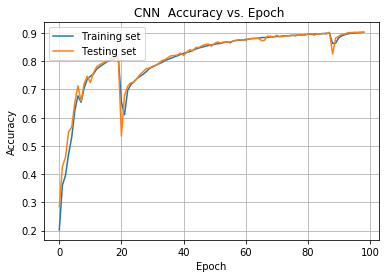

In [45]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_cldnn_mdata.history['accuracy'])
plt.plot(CNN_cldnn_mdata.history['val_accuracy'])
plt.title('CNN  Accuracy vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

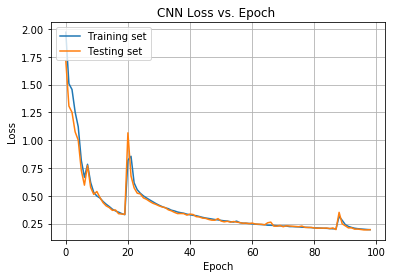

In [47]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_cldnn_mdata.history['loss'])
plt.plot(CNN_cldnn_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training set','Testing set'],loc='upper left')
plt.grid(True)
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, this model is a good fit for the data as the difference between training and testing loss is less than 1% with testing accuracy >90%.

2.   Give two ways to improve the robustness of the model.

  ANS: We can use noise injection, data augmentation to make the model more robust against unseen data points.